In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem, Mol, Bond, Atom, Draw

from rdkit.Chem.rdchem import BondType

import numpy as np

m: Mol = Chem.MolFromSmiles('C(C(C)C)[Mg+].Oc1ncc(cc1)C(=O)N(C)OC')
m2: Mol = Chem.MolFromSmiles('BrBr')

m = Chem.AddHs(m)

# 3D representation so that MolToMolBlock displays 3d coordinates and bond data
# AllChem.EmbedMolecule(m)

bond_types = {
    BondType.SINGLE: 1,
    BondType.DOUBLE: 2,
    BondType.AROMATIC: 1.5,
}

n = m.GetNumAtoms()
connectivity = np.zeros((n,n))

bond: Bond
for bond in m.GetBonds():
    i_start, i_end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    
    if i_start > i_end:
        i_start, i_end = i_end, i_start
    connectivity[i_start, i_end] = bond_types[bond.GetBondType()]
        
        
# Copy upper triangle to lower triangle
i_lower = np.tril_indices(n, -1)
connectivity[i_lower] = connectivity.T[i_lower]

# Normalize 
for atom_bonds in connectivity:
    atom_bonds /= sum(atom_bonds)
        
laplacian = np.identity(n) - connectivity


# Pretty print
for i, row in enumerate(laplacian):
    print(f'Atom {i:^2}:', *(f'{n:^6}' for n in row), sep=" ")
    
print()
print("Row Sums:", sum(laplacian.T))

Atom 0 :  1.0   -0.25   0.0    0.0   -0.25   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.25  -0.25   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
Atom 1 : -0.25   1.0   -0.25  -0.25   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.25   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
Atom 2 :  0.0   -0.25   1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.25  -0.25  -0.25   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
Atom 3 :  0.0   -0.25   0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.25  -0.25  -0.25

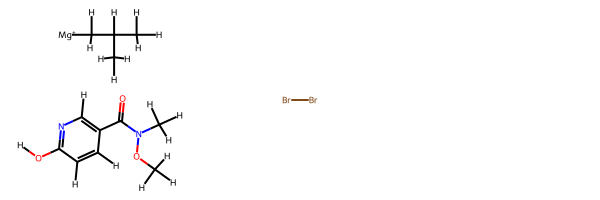

In [9]:
Draw.MolsToGridImage([m,m2])

![convert notebook to web app](https://pubs.acs.org/cms/10.1021/jp4010345/asset/images/large/jp-2013-010345_0008.jpeg)